In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('stock_data/NVDA.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

a)  For each 5-min interval, create a histogram plot for total volume against the time
of a day. (x axis – time, y axis – total volume).

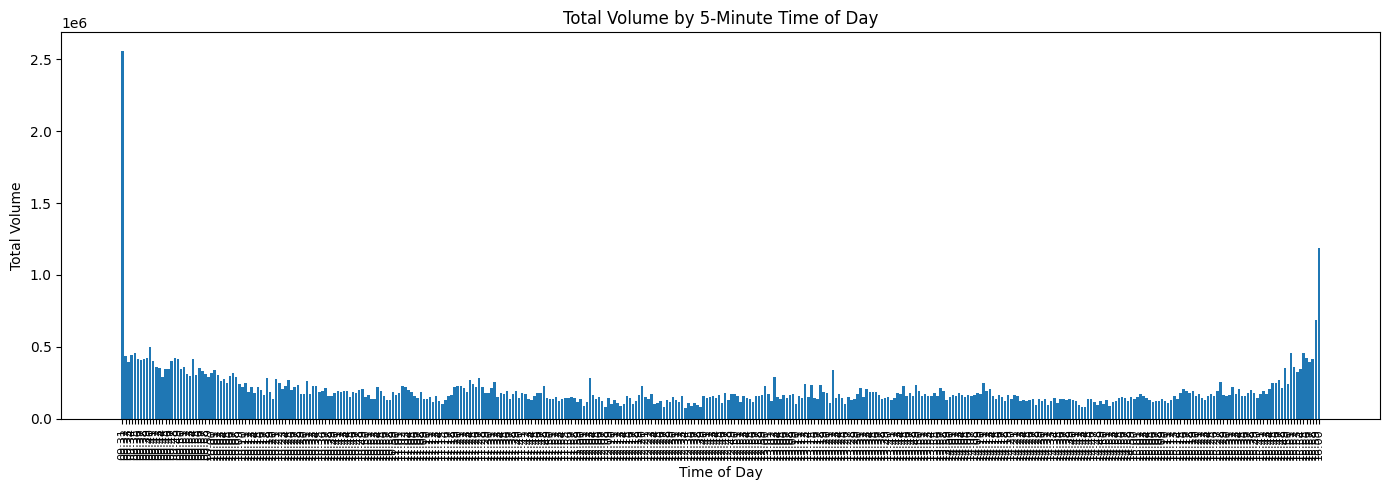

In [29]:
# Extract time of day as string (HH:MM format for 5-minute buckets)
df['TimeOfDay'] = df['timestamp'].dt.strftime('%H:%M')

# Group by time of day across all dates and sum volume
volume_by_time = df.groupby('TimeOfDay')['volume'].sum()

# Sort by actual time
volume_by_time.index = pd.to_datetime(volume_by_time.index, format='%H:%M')
volume_by_time = volume_by_time.sort_index()

# Plot histogram-like bar chart
plt.figure(figsize=(14, 5))
plt.bar(volume_by_time.index.strftime('%H:%M'), volume_by_time.values, width=0.8)
plt.xticks(rotation=90, fontsize=8)
plt.title('Total Volume by 5-Minute Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Volume')
plt.tight_layout()
plt.show()

b) Plot a line chart for the volatility of each time interval. (Volatility = abs(close –
open) / open)

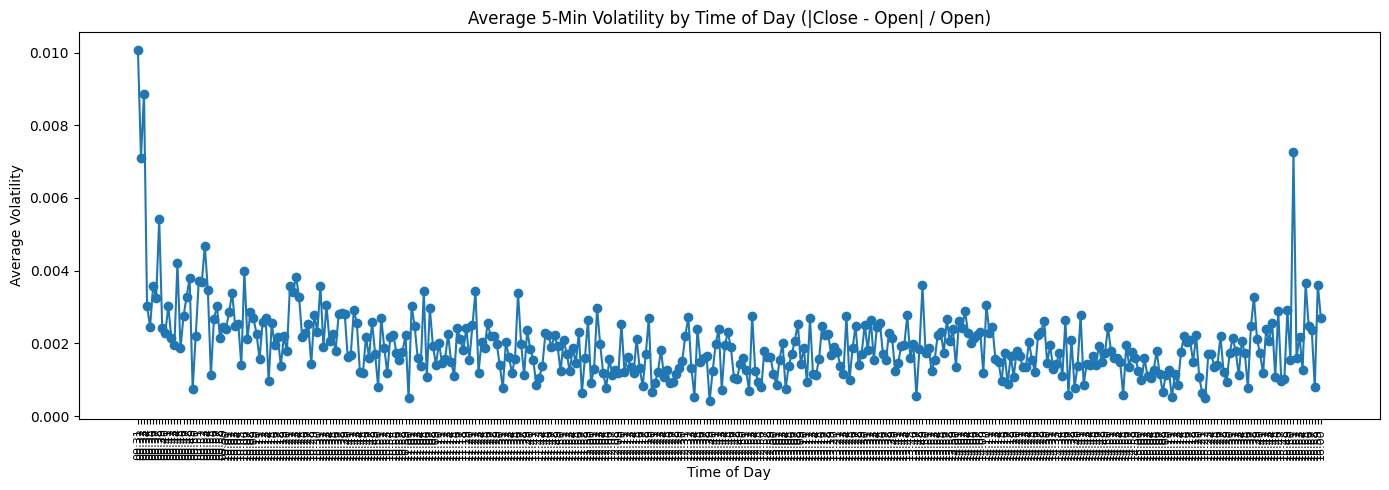

In [34]:
df['volatility'] = (df['close'] - df['open']).abs() / df['open']

volatility_by_time = df.groupby('TimeOfDay')['volatility'].mean()

volatility_by_time.index = pd.to_datetime(volatility_by_time.index, format='%H:%M')
volatility_by_time = volatility_by_time.sort_index()

plt.figure(figsize=(14, 5))
plt.plot(volatility_by_time.index.strftime('%H:%M'), volatility_by_time.values, marker='o')
plt.xticks(rotation=90, fontsize=8)
plt.title('Average 5-Min Volatility by Time of Day (|Close - Open| / Open)')
plt.xlabel('Time of Day')
plt.ylabel('Average Volatility')
plt.tight_layout()
plt.show()

c) Calculate two volatility time series using two different approaches: 
i) abs(close – open)/open, 
ii) abs(high-low)/low, and plot the correlation between two series with a scatter plot.

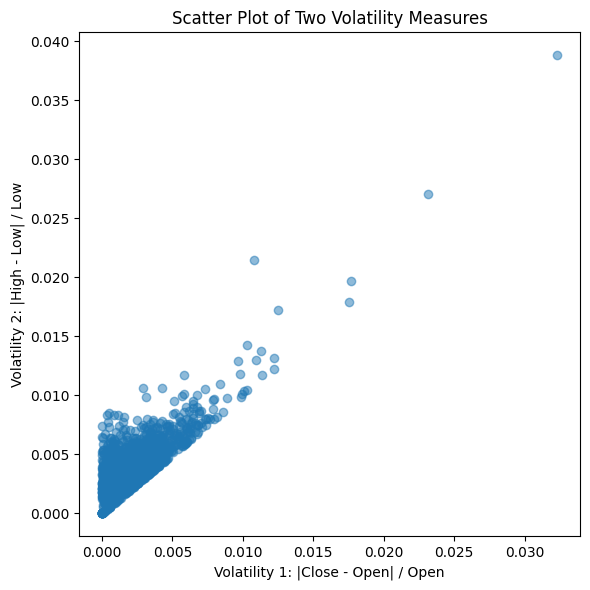

Correlation between vol1 and vol2: 0.8269


In [37]:
# Calculate volatility series
df['vol1'] = (df['close'] - df['open']).abs() / df['open']
df['vol2'] = (df['high'] - df['low']).abs() / df['low']

df = df.dropna(subset=['vol1', 'vol2'])
df = df[df['low'] > 0] 

# --- Scatter Plot ---
plt.figure(figsize=(6, 6))
plt.scatter(df['vol1'], df['vol2'], alpha=0.5)
plt.xlabel('Volatility 1: |Close - Open| / Open')
plt.ylabel('Volatility 2: |High - Low| / Low')
plt.title('Scatter Plot of Two Volatility Measures')
plt.tight_layout()
plt.show()

# --- Correlation ---
correlation = df[['vol1', 'vol2']].corr().iloc[0, 1]
print(f"Correlation between vol1 and vol2: {correlation:.4f}")